load libraries

In [1]:
from ma_mapper import mapper
from ma_mapper import plots

### Initial Parameters

In [2]:
alignment_filepath = '/rds/project/rds-XrHDlpCeVDg/users/pakkanan/data/output/ma_mapper/hg38_main/alignment/THE1C.fasta.aligned'
genomewide_data_filepath = '/rds/project/rds-XrHDlpCeVDg/users/pakkanan/data/resource/annotation/homer_known_motif_hg38/AP-1(bZIP).bed'

Extract genomewide data into data matrix using coordinates and alignment structure from the alignment file 

In [3]:
output_matrix=mapper.map_and_overlay(alignment_filepath, genomewide_data_filepath,data_format='bed')

2025-03-19 06:39:13,578 INFO: parse alignment
2025-03-19 06:39:20,293 INFO: extract from bed file: /rds/project/rds-XrHDlpCeVDg/users/pakkanan/data/resource/annotation/homer_known_motif_hg38/AP-1(bZIP).bed
2025-03-19 06:39:52,420 INFO: done, returning bed_out as object
2025-03-19 06:39:52,678 INFO: {<class 'numpy.float64'>}
2025-03-19 06:39:52,679 INFO: nested_data:False


In [4]:
output_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# DOWNSTREAM ANALYSES
As stated in the introduction, ma_mapper output is a numerical matrix of genome-wide data that has the same gap-structure like sequence alignment.

To properly analyze the extracted data, ma_mapper offer a function that would consider the gaps structure in each column using alignment matrix as reference

In [5]:
alignment_matrix, coordinate_table=mapper.parse_and_filter(alignment_filepath)
mean_output=mapper.normalise(alignment_matrix=alignment_matrix, data_matrix=output_matrix, method = 'average')
coverage_output=mapper.normalise(alignment_matrix=alignment_matrix, data_matrix=output_matrix, method = 'perc_coverage')
median_output=mapper.normalise(alignment_matrix=alignment_matrix, data_matrix=output_matrix, method = 'median')

2025-03-19 06:40:50,430 INFO: parse alignment


In [11]:
alignment_matrix

array([[3., 4., 1., ..., 1., 2., 1.],
       [3., 4., 1., ..., 1., 2., 1.],
       [3., 4., 1., ..., 1., 2., 1.],
       ...,
       [3., 4., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 2., 1.],
       [3., 4., 2., ..., 1., 0., 0.]])

In [12]:
coordinate_table

,chrom,start,end,name,score,strand,original_order
0,chr1,119563,119944,THE1C_0,20,-,0
1,chr1,296133,296514,THE1C_1,20,-,1
2,chr1,710552,710933,THE1C_2,20,-,2
3,chr19,181416,181797,THE1C_3502,20,-,3
4,chr9,138295330,138295711,THE1C_9041,20,+,4
...,...,...,...,...,...,...,...
9775,chr16,63291039,63291257,THE1C_2951,20,+,9775
9776,chrY,16695786,16696114,THE1C_9770,20,+,9776
9778,chr2,190537612,190537920,THE1C_4233,20,+,9778
9782,chr1,104208527,104208749,THE1C_335,20,-,9782


In [8]:
mean_output

array([1.13104524e-02, 9.03501067e-03, 8.78129821e-03, 8.69258781e-03,
       6.41175099e-03, 5.44927536e-03, 5.44170430e-03, 5.41786744e-03,
       5.41786744e-03, 4.59770115e-03, 5.65362871e-03, 5.64906617e-03,
       5.71029018e-03, 6.96055684e-03, 3.98826979e-03, 3.92700393e-03,
       5.74118728e-03, 4.72023947e-03, 4.73004153e-03, 4.72132658e-03,
       6.29722922e-03, 6.30300252e-03, 3.43367289e-03, 3.43642612e-03,
       2.52960791e-03, 1.60366552e-03, 2.39343515e-03, 4.43383356e-03,
       5.00113662e-03, 4.20406772e-03, 4.20693576e-03, 4.21364309e-03,
       4.20645748e-03, 4.21220401e-03, 4.21508316e-03, 3.42504852e-03,
       1.37127185e-03, 8.05338242e-04, 2.30282096e-03, 2.31026915e-03,
       2.32342007e-03, 1.51197953e-03, 2.31910946e-03, 2.31427910e-03,
       3.98826979e-03, 4.07136870e-03, 4.10628019e-03, 1.79349219e-03,
       2.71915059e-03, 9.26784059e-04, 1.85455027e-03, 9.17431193e-04,
       9.13122880e-04, 8.56478649e-04, 8.36620055e-04, 8.25179771e-04,
      

In [9]:
coverage_output

array([1.69006760e-01, 1.38034885e-01, 1.30532811e-01, 1.29214143e-01,
       9.32618326e-02, 6.95652174e-02, 6.94685655e-02, 6.91642651e-02,
       6.91642651e-02, 5.74712644e-02, 6.92281066e-02, 6.91722389e-02,
       6.99219205e-02, 8.54805227e-02, 4.69208211e-02, 4.62000462e-02,
       6.88942473e-02, 5.75638959e-02, 5.76834333e-02, 5.75771534e-02,
       8.01465537e-02, 8.02200321e-02, 4.57823051e-02, 4.58190149e-02,
       3.44946533e-02, 2.29095074e-02, 3.41919307e-02, 6.82128240e-02,
       7.95635372e-02, 6.81740711e-02, 6.82205799e-02, 6.83293475e-02,
       6.82128240e-02, 6.83060109e-02, 6.83526999e-02, 5.70841420e-02,
       2.28545309e-02, 1.15048320e-02, 3.45423143e-02, 3.46540372e-02,
       3.48513011e-02, 2.32612235e-02, 3.47866419e-02, 3.47141865e-02,
       5.86510264e-02, 5.98730691e-02, 6.03864734e-02, 2.56213169e-02,
       3.88450084e-02, 1.32397723e-02, 2.64935753e-02, 1.31061599e-02,
       1.30446126e-02, 1.22354093e-02, 1.19517151e-02, 1.17882824e-02,
      

In [10]:
median_output

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Visualization
the plot function can also helps plotting a 2D plot

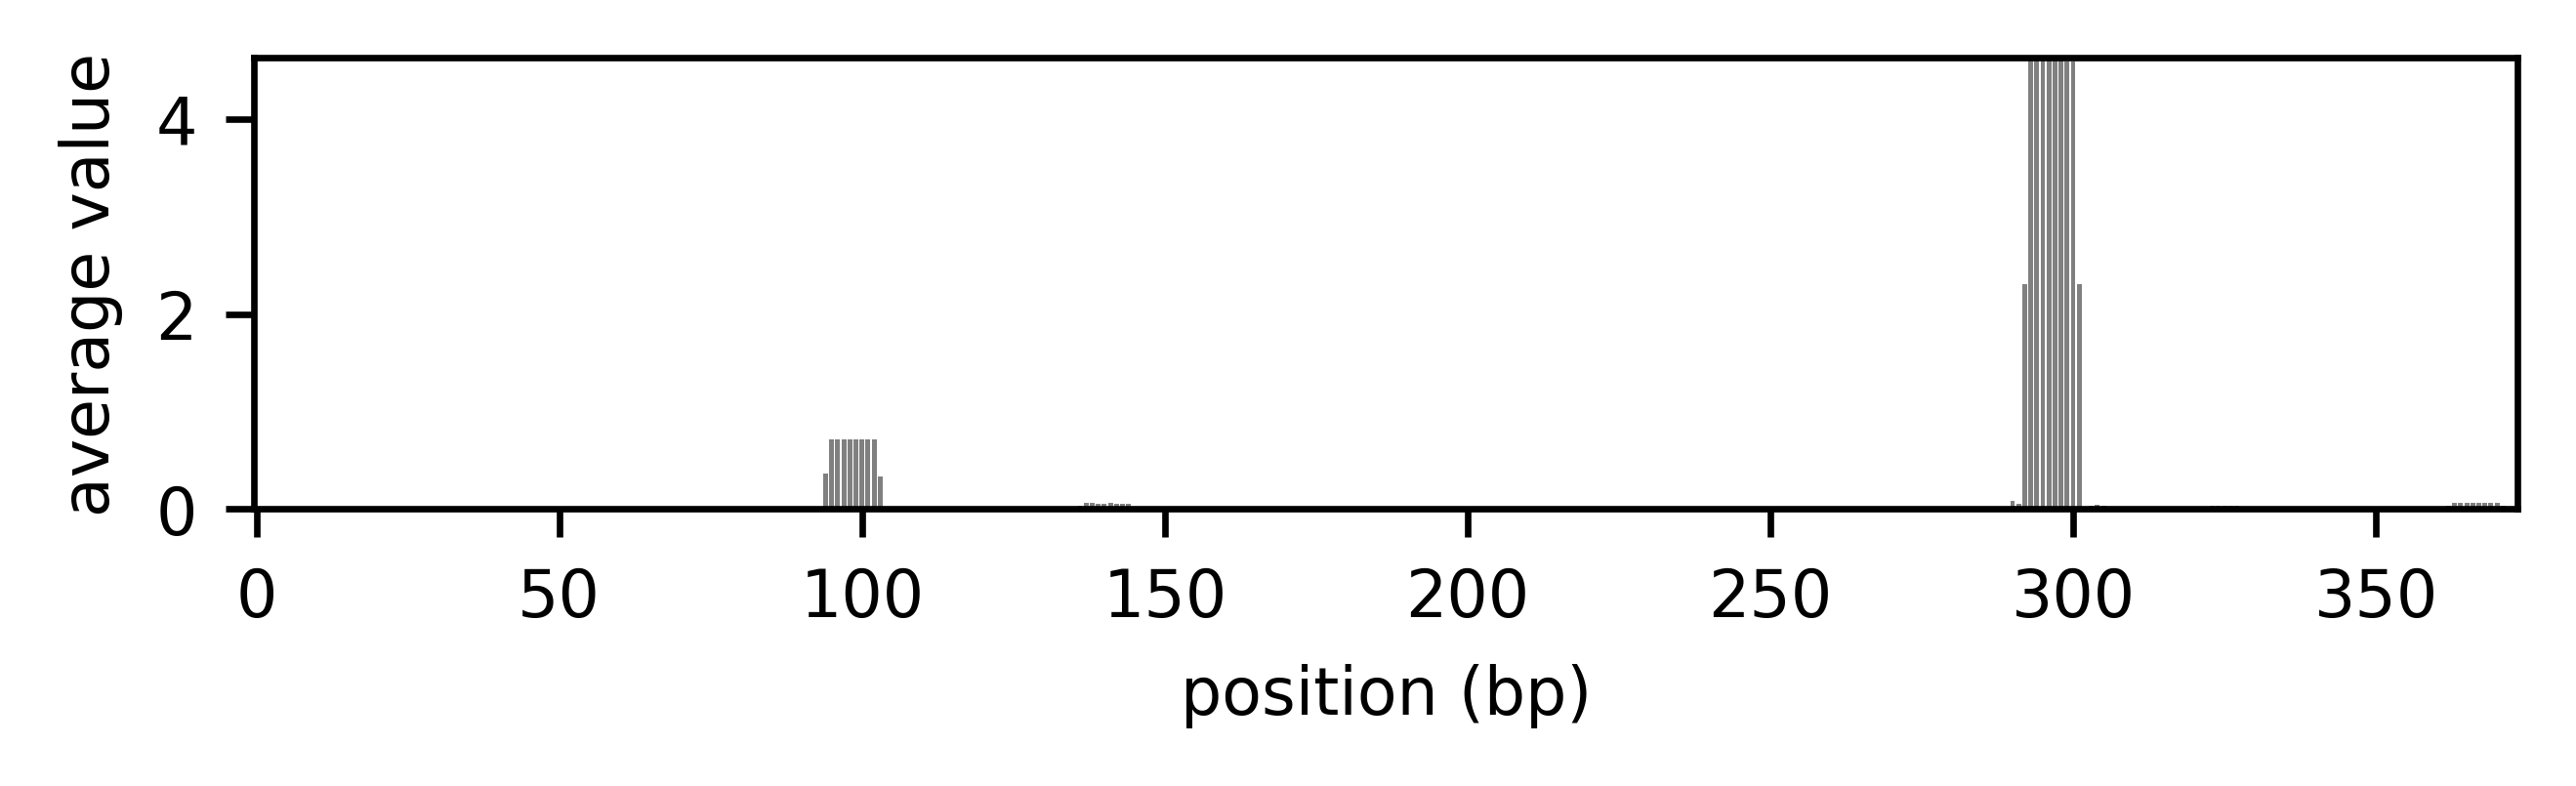

In [6]:
plots.plot(aggregated_data=[mean_output], aggregated=True,heatmap=False,agg_colset=['grey'], agg_ylabel=['average value'],agg_ylabel_fs=8, agg_xlabel='position (bp)', agg_xlabel_fs=8)

Plots can be stacked 

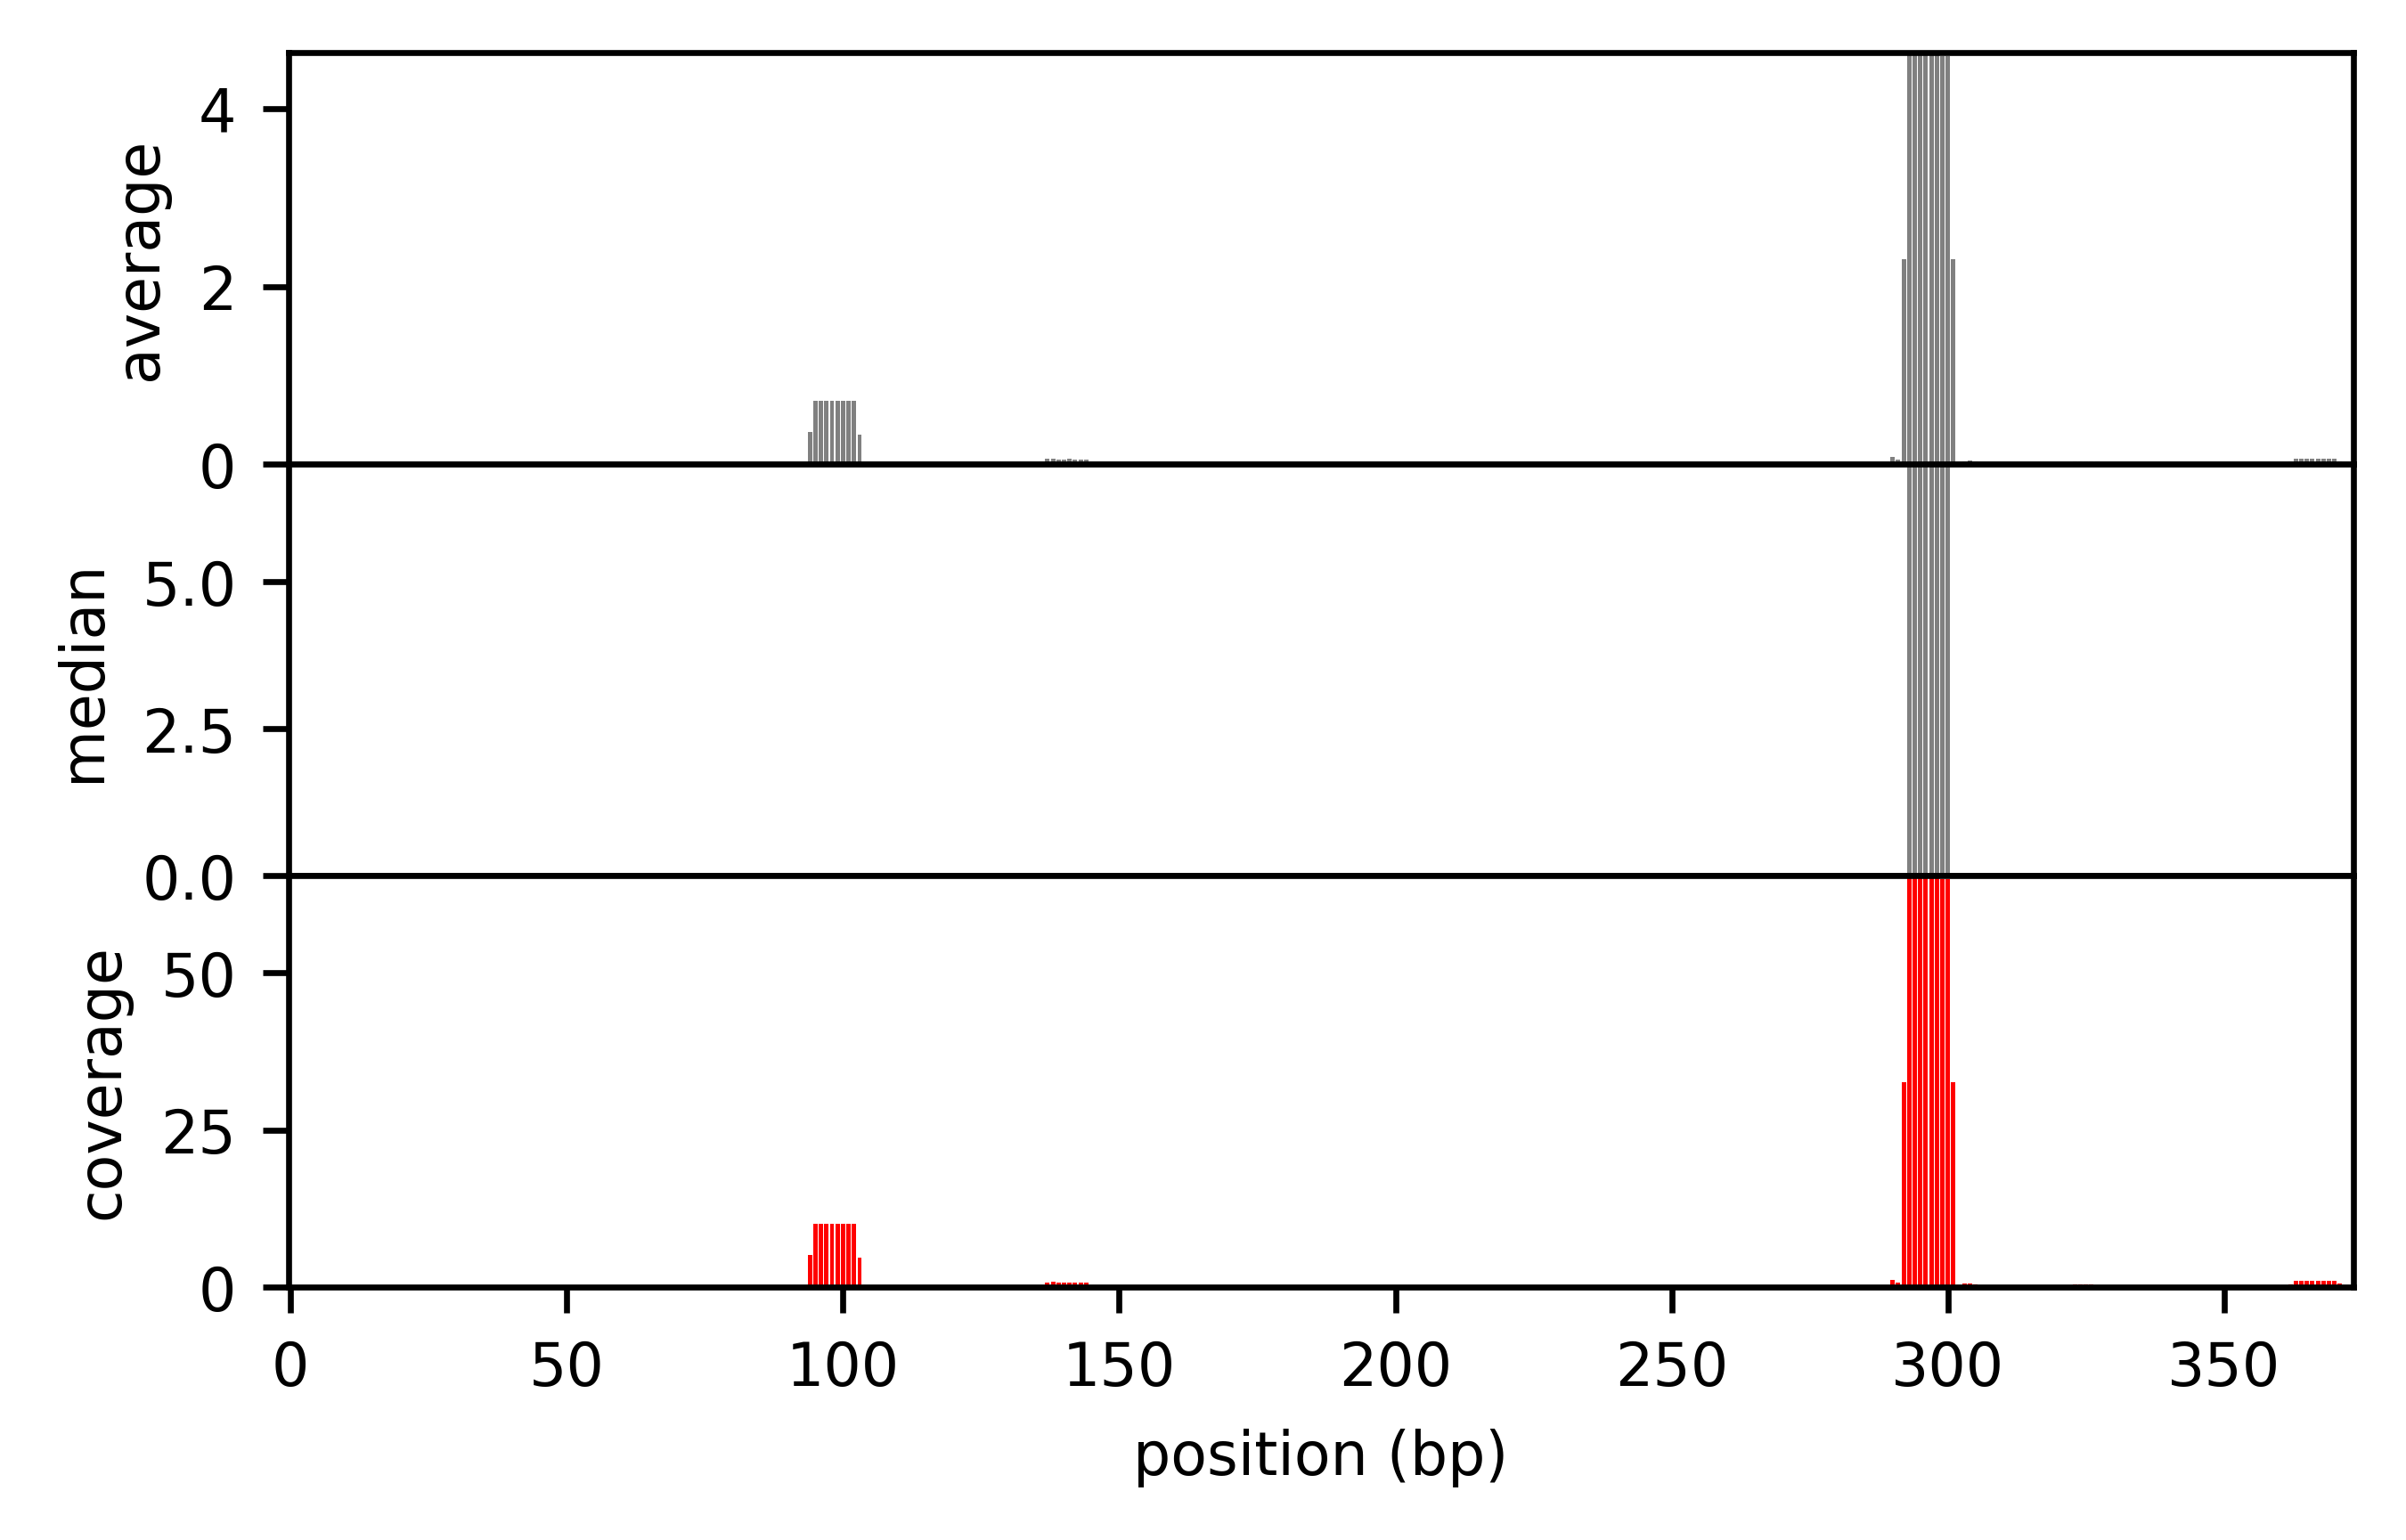

In [7]:
plots.plot(aggregated_data=[mean_output, median_output, coverage_output], aggregated=True,heatmap=False,agg_colset=['grey','grey','red'], agg_ylabel=['average','median','coverage'],agg_ylabel_fs=8, agg_xlabel='position (bp)', agg_xlabel_fs=8)

Since the plot function accepts 1d array as long as the length matches, a user can make their own analysis and plot the result using plots module